C:\Users\rishi\anaconda3\lib\site-packages\ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


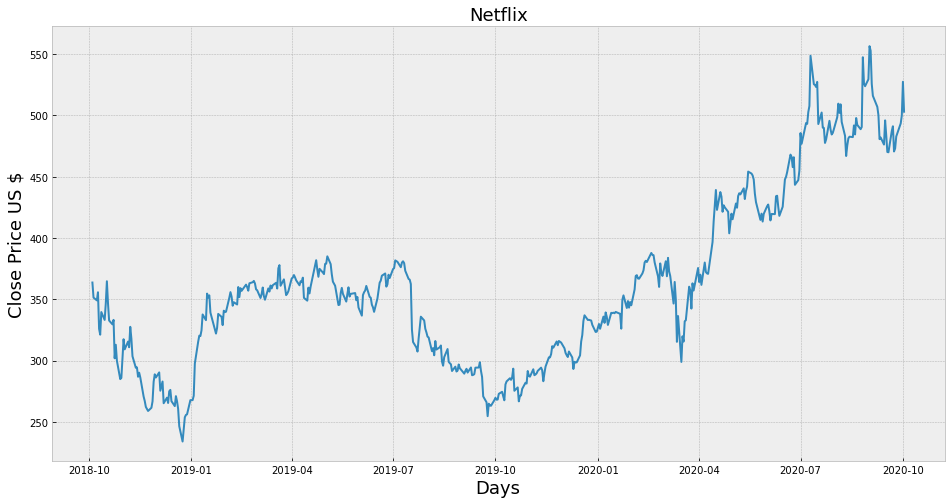

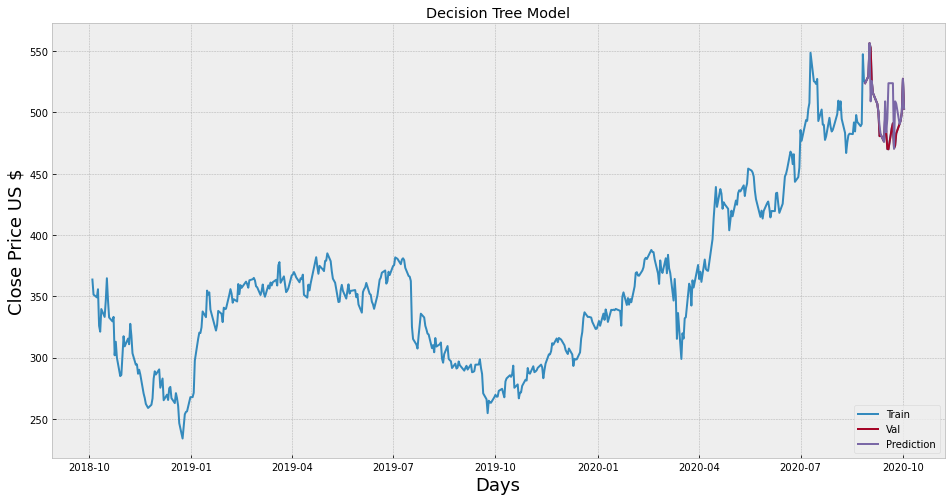

In [7]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime as dt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters  # for registering plot function in Pandas
register_matplotlib_converters()
import matplotlib.pyplot as plt
plt.style.use('bmh')


# Importing Netflix Data
data = web.DataReader(name='NFLX', data_source='yahoo', start=dt.datetime.today() - dt.timedelta(days=2*365))
# print(data.head())
# print(data.tail())


# Plotting the closing price
plt.figure(figsize=(16, 8))
plt.title(label='Netflix', fontsize=18)
plt.xlabel(xlabel='Days', fontsize=18)
plt.ylabel(ylabel='Close Price US $', fontsize=18)
plt.plot(data['Close'])
# plt.show()


# Sub-setting data to have only Close price
data = data[['Close']]


# To predict stock price for x number of days in future
future_days = 25
# Target or dependent variable column with shifted(x days) prices
data['Prediction'] = data[['Close']].shift(periods=-future_days)  # In a sense, we are shifting 'x' days backwards
# print(data.head())
# print(data.tail())


# Creating feature data set
X = np.array(data.drop(['Prediction'], 1))[:-future_days]  # Dropping Prediction column (i.e. selecting 'Close'
# column, slicing last 'x' days data. This data set is called feature(independent) data set
# Creating Target data set
y = np.array(data['Prediction'])[:-future_days]  # Selecting Predicting column, slicing last 'x' days data. This data
# set is called Dependent data set


# Splitting Data (randomly) into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


# Creating Decision Tree Regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
# Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)


# Getting feature data but as a Data Frame not as numpy array as in Line 42
x_future = data.drop(['Prediction'], 1)[:-future_days]
# Getting the last 'x' rows from the feature data set. So, in a way we are slicing twice
x_future = np.array(x_future.tail(future_days))


# Decision tree model prediction
tree_prediction = tree.predict(x_future)
# print(tree_prediction)
# Linear regression model prediction
lr_prediction = lr.predict(x_future)
# print(lr_prediction)


# Visualizing predictions from each model and comparing it with original values
original_values = data[X.shape[0]:]  # Taking last 25 values from original data set 'Data' by subsetting it with the
# shape of feature data set 'X'. Shape function will give the  number of rows in 'X', which is used for subsetting.
# This can also be done by original_values = data[478: ], subtracting future_days from number of rows.
original_values['Prediction'] = tree_prediction  # Feeding the Prediction column with predicted data from Decision
# tree model
plt.figure(figsize=(16, 8))
plt.title('Decision Tree Model')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close Price US $', fontsize=18)
plt.plot(data['Close'])
plt.plot(original_values[['Close', 'Prediction']])
plt.legend(['Train', 'Val', 'Prediction'], loc='lower right')
plt.show()

In [6]:
valid = data[X.shape[0]:]
valid
values = data[478:]
values == valid


,Close,Prediction
Date,,
2020-08-28,True,True
2020-08-31,True,True
2020-09-01,True,True
2020-09-02,True,True
2020-09-03,True,True
2020-09-04,True,True
2020-09-08,True,True
2020-09-09,True,True
2020-09-10,True,True
